# Midterm Project

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
import pandas as pd
import warnings
from hmmlearn import hmm
warnings.filterwarnings("ignore")

# 1. Data Ingestion

In [2]:
# Import rawdata for analysis
data = pd.read_csv('ElectrofaciesVolve.csv')
data.head()

,Well,Depth,GR,PEF1,PEF2,DT,ROP,WOB,DownT,Torque,...,Mudflow,ECD,BS,RT,RHOB,NPHI,Vquartz,Vsh,Vcarb,Facies
0,1,2922.5,13.4058,8.7053,NaN,77.1874,4.5008,4.3012,71.0,23.583,...,2200.9165,1.4182,8.5,1.6100,2.4838,0.1439,NaN,NaN,NaN,0
1,1,2923.0,15.2468,6.4380,NaN,75.5047,6.5108,4.9543,71.0,33.721,...,1993.9286,1.4188,8.5,1.6648,2.4837,0.1503,NaN,NaN,NaN,0
2,1,2923.5,11.2243,6.2109,NaN,75.5697,7.6733,7.0439,71.0,34.831,...,1993.9286,1.4195,8.5,1.6856,2.4823,0.1434,NaN,NaN,NaN,0
3,1,2924.0,11.7085,5.9728,NaN,75.9891,10.2010,7.0977,72.0,35.166,...,1993.9286,1.4204,8.5,1.4633,2.4479,0.1458,NaN,NaN,NaN,0
4,1,2924.5,16.3429,6.1139,NaN,75.1929,12.8272,9.6089,72.0,34.892,...,1993.9286,1.4206,8.5,1.5418,2.4836,0.1638,NaN,NaN,NaN,0


In [3]:
# Create a list of well IDs, which we will extract a new dataframe from
wellID_list=[1]

# Extract a new DataFrame where 'Well' is in the well ID list
rawdata = data[data['Well'].isin(wellID_list)]
rawdata.head()

,Well,Depth,GR,PEF1,PEF2,DT,ROP,WOB,DownT,Torque,...,Mudflow,ECD,BS,RT,RHOB,NPHI,Vquartz,Vsh,Vcarb,Facies
0,1,2922.5,13.4058,8.7053,NaN,77.1874,4.5008,4.3012,71.0,23.583,...,2200.9165,1.4182,8.5,1.6100,2.4838,0.1439,NaN,NaN,NaN,0
1,1,2923.0,15.2468,6.4380,NaN,75.5047,6.5108,4.9543,71.0,33.721,...,1993.9286,1.4188,8.5,1.6648,2.4837,0.1503,NaN,NaN,NaN,0
2,1,2923.5,11.2243,6.2109,NaN,75.5697,7.6733,7.0439,71.0,34.831,...,1993.9286,1.4195,8.5,1.6856,2.4823,0.1434,NaN,NaN,NaN,0
3,1,2924.0,11.7085,5.9728,NaN,75.9891,10.2010,7.0977,72.0,35.166,...,1993.9286,1.4204,8.5,1.4633,2.4479,0.1458,NaN,NaN,NaN,0
4,1,2924.5,16.3429,6.1139,NaN,75.1929,12.8272,9.6089,72.0,34.892,...,1993.9286,1.4206,8.5,1.5418,2.4836,0.1638,NaN,NaN,NaN,0


In [4]:
rawdata.describe()

,Well,Depth,GR,PEF1,PEF2,DT,ROP,WOB,DownT,Torque,...,Mudflow,ECD,BS,RT,RHOB,NPHI,Vquartz,Vsh,Vcarb,Facies
count,534.0,534.000000,534.000000,534.000000,0.0,534.000000,534.000000,534.000000,534.000000,534.000000,...,534.000000,534.000000,534.0,534.000000,534.000000,534.000000,0.0,0.0,0.0,534.000000
mean,1.0,3062.042135,41.994066,5.200142,NaN,79.061649,22.201232,6.553471,85.468165,35.123652,...,2332.045097,1.441332,8.5,3.214898,2.500460,0.153753,NaN,NaN,NaN,0.449438
std,0.0,83.629177,25.825989,0.776614,NaN,8.919196,6.815326,2.984674,6.678978,3.135973,...,106.911405,0.013334,0.0,4.138785,0.119107,0.058103,NaN,NaN,NaN,0.624897
min,1.0,2922.500000,5.769100,3.168200,NaN,58.420000,4.500800,-3.263200,71.000000,23.583000,...,1943.103100,1.413700,8.5,0.319600,2.130400,0.054500,NaN,NaN,NaN,0.000000
25%,1.0,2989.625000,23.134800,4.667900,NaN,73.948075,18.205825,5.187050,81.000000,34.362500,...,2220.398875,1.433100,8.5,1.607750,2.484050,0.109650,NaN,NaN,NaN,0.000000
50%,1.0,3057.250000,37.164950,5.272750,NaN,79.158100,21.944450,6.799300,88.000000,35.897000,...,2392.714400,1.441000,8.5,2.168350,2.536950,0.149050,NaN,NaN,NaN,0.000000
75%,1.0,3138.875000,55.491425,5.760750,NaN,84.845325,25.889425,8.381750,91.000000,37.137250,...,2392.714400,1.450000,8.5,3.287975,2.581400,0.185475,NaN,NaN,NaN,1.000000
max,1.0,3206.000000,197.197900,8.705300,NaN,122.440300,40.046900,13.605000,94.000000,40.169000,...,2392.714400,1.471200,8.5,45.060000,2.689400,0.507600,NaN,NaN,NaN,2.000000


# 2. Data Preparation

In [5]:
# Extract surface drilling parameters 
rawdata = rawdata[['ROP','WOB','Torque','SurfRPM','Facies']]
rawdata.head()

,ROP,WOB,Torque,SurfRPM,Facies
0,4.5008,4.3012,23.583,79.554,0
1,6.5108,4.9543,33.721,79.394,0
2,7.6733,7.0439,34.831,79.254,0
3,10.2010,7.0977,35.166,79.616,0
4,12.8272,9.6089,34.892,79.828,0


### 2.1 Missing Value Treatment

In [6]:
# Check for missing values
rawdata.isna().sum()

ROP        0
WOB        0
Torque     0
SurfRPM    0
Facies     0
dtype: int64

**Comment**

There are no missing values

### 2.2 Outliers Treatment

In [7]:
# Rename the features of the new dataframe
rawdata = rawdata.rename(columns={'SurfRPM': 'RPM'})

##### 2.2.1 Bivariate Analysis

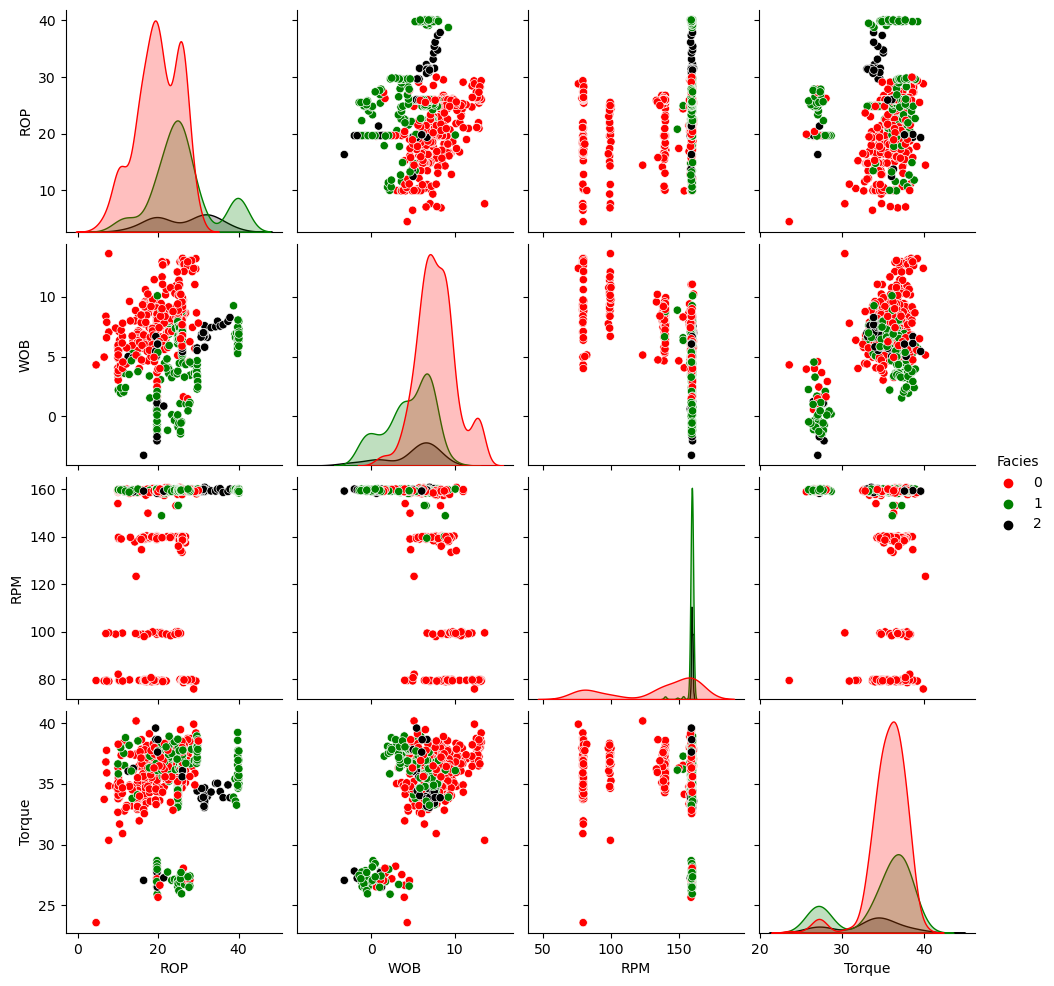

In [8]:
# Create a matrix scatterplot
sns.pairplot(rawdata, vars=['ROP','WOB','RPM','Torque'], hue = 'Facies', palette = ['Red','Green', 'Black'])

##### 2.2.2 Univariate Analysis

<AxesSubplot:ylabel='ROP'>

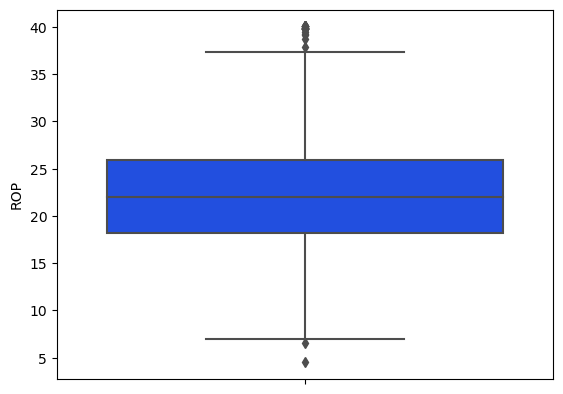

In [9]:
sns.boxplot(y=rawdata['ROP'], palette = "bright")

<AxesSubplot:ylabel='WOB'>

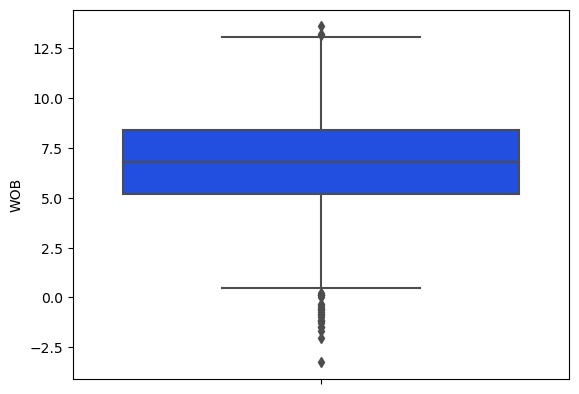

In [10]:
sns.boxplot(y=rawdata['WOB'], palette = "bright")

<AxesSubplot:ylabel='RPM'>

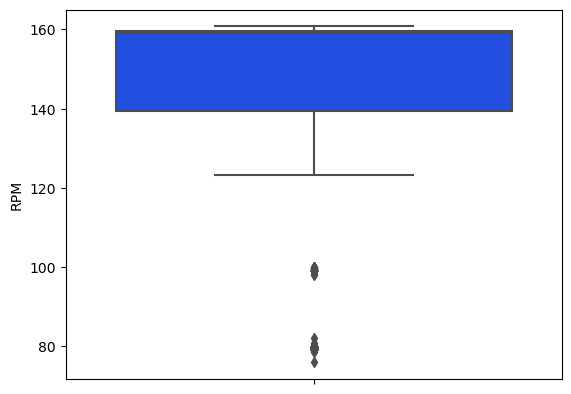

In [11]:
sns.boxplot(y=rawdata['RPM'], palette = "bright")

<AxesSubplot:ylabel='Torque'>

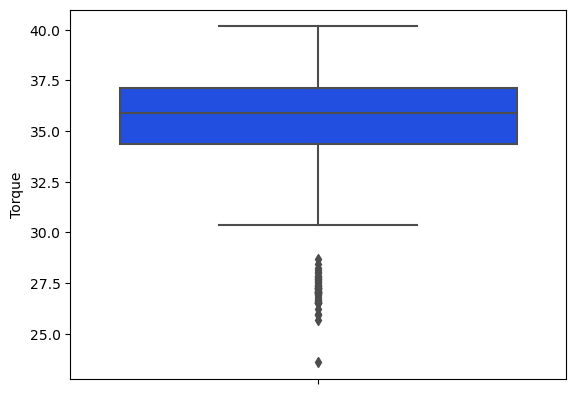

In [12]:
sns.boxplot(y=rawdata['Torque'], palette = "bright")

In [13]:
df_clean = rawdata[(rawdata['WOB'] > 0) & 
                 (rawdata['Torque'] > 30) &
                 (rawdata['RPM'] > 120) & 
                 (rawdata['ROP'] > 6) & (rawdata['ROP'] < 37)
                 ]
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 358 entries, 90 to 479
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ROP     358 non-null    float64
 1   WOB     358 non-null    float64
 2   Torque  358 non-null    float64
 3   RPM     358 non-null    float64
 4   Facies  358 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 16.8 KB


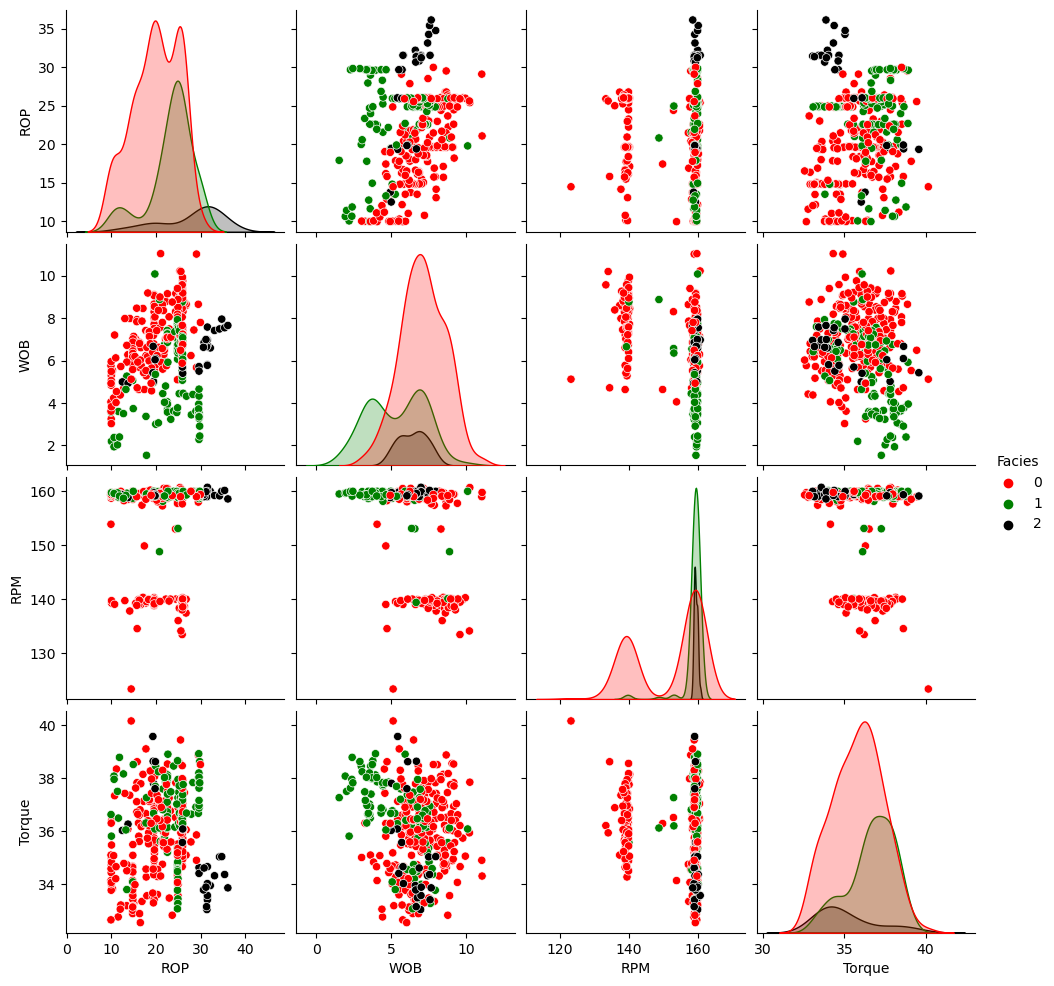

In [14]:
# Create a matrix scatterplot
sns.pairplot(df_clean, vars=['ROP','WOB','RPM','Torque'], hue = 'Facies', palette = ['Red','Green', 'Black'])

# 3. Exploration Data Analysis

### 3.1: Visualization of Features Distribution

Text(0.5, 1.0, 'ROP Distribution')

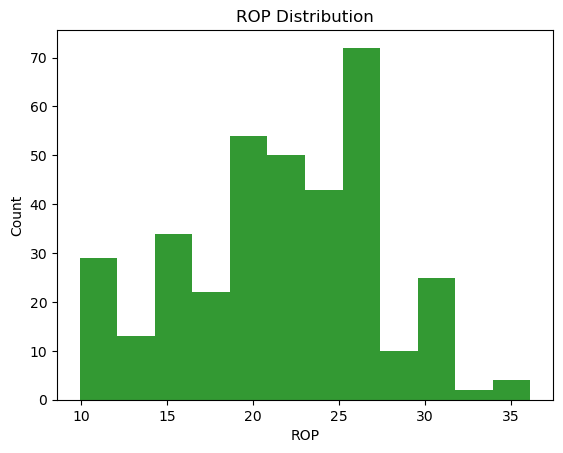

In [15]:
# Visualize the distribution of the Rate of Penetration (ROP)
sns.distplot(df_clean['ROP'], kde=False, 
             color="green", hist_kws={"alpha": 0.8});
plt.ylabel("Count");
plt.title('ROP Distribution')

Text(0.5, 1.0, 'WOB Distribution')

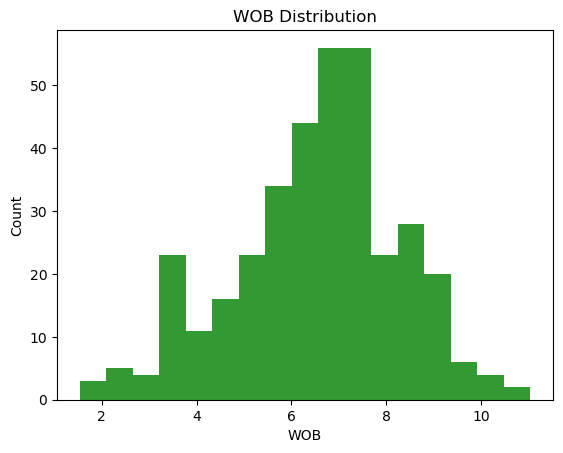

In [16]:
# Visualize the distribution of the Rate of Penetration (ROP)
sns.distplot(df_clean['WOB'], kde=False, 
             color="green", hist_kws={"alpha": 0.8});
plt.ylabel("Count");
plt.title('WOB Distribution')

Text(0.5, 1.0, 'RPM Distribution')

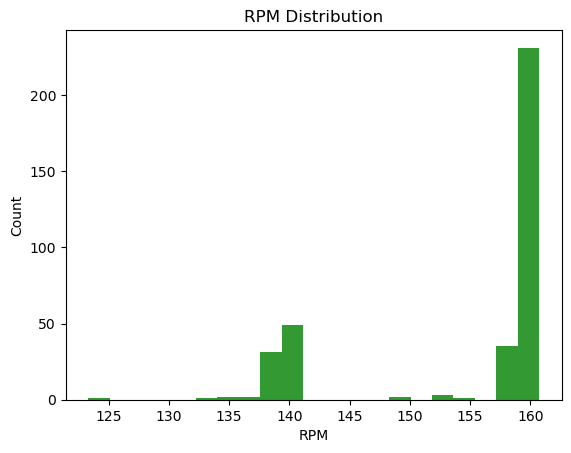

In [17]:
# Visualize the distribution of the Rate of Penetration (ROP)
sns.distplot(df_clean['RPM'], kde=False, 
             color="green", hist_kws={"alpha": 0.8});
plt.ylabel("Count");
plt.title('RPM Distribution')

Text(0.5, 1.0, 'Torque Distribution')

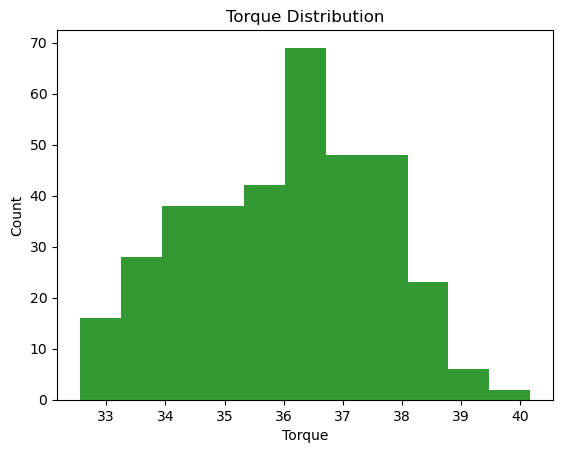

In [18]:
# Visualize the distribution of the Rate of Penetration (ROP)
sns.distplot(df_clean['Torque'], kde=False, 
             color="green", hist_kws={"alpha": 0.8});
plt.ylabel("Count");
plt.title('Torque Distribution')

**Comment**

It can be observed that all features are normally distributed except RPM.

### 3.2: Visualization of Features Distribution according to Facies

In [19]:
# group by the Facies and determine the mean of each feature
df_p = df_clean.groupby(['Facies']).mean()
df_p = df_p.reset_index()
df_p.head()

,Facies,ROP,WOB,Torque,RPM
0,0,19.984571,7.094263,35.813535,151.686978
1,1,23.424700,5.336655,36.666533,158.867057
2,2,27.933385,6.411763,35.169037,159.458259


Text(0.5, 1.0, 'Average ROP according to Facies')

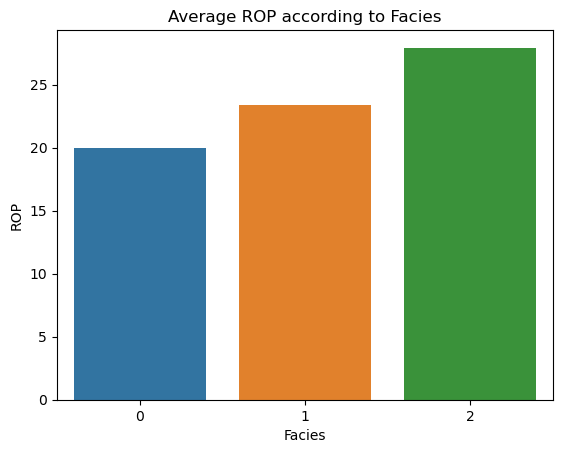

In [20]:
sns.barplot(x=df_p["Facies"], y=df_p["ROP"])
plt.title('Average ROP according to Facies')

Text(0.5, 1.0, 'Average WOB according to Facies')

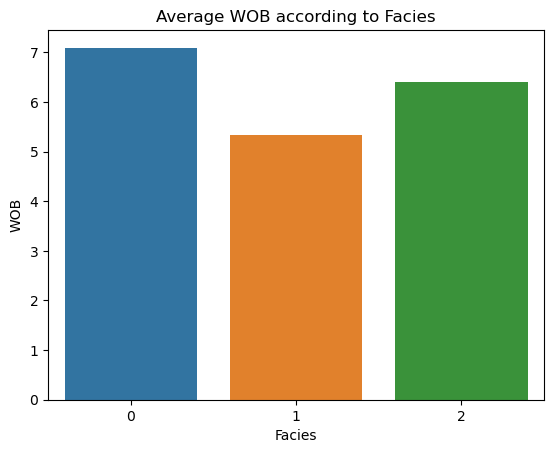

In [21]:
sns.barplot(x=df_p["Facies"], y=df_p["WOB"])
plt.title('Average WOB according to Facies')

Text(0.5, 1.0, 'Average RPM according to Facies')

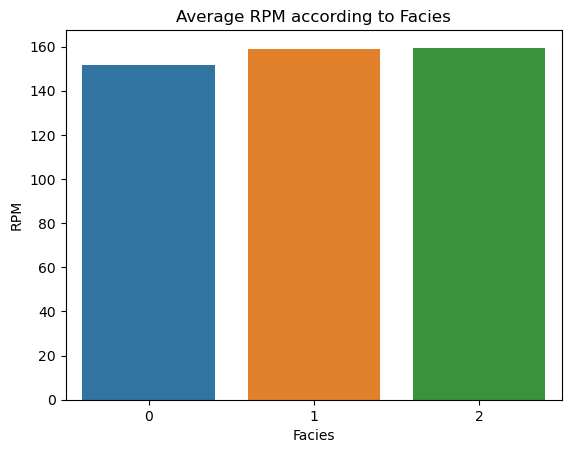

In [22]:
sns.barplot(x=df_p["Facies"], y=df_p["RPM"])
plt.title('Average RPM according to Facies')

Text(0.5, 1.0, 'Average Torque according to Facies')

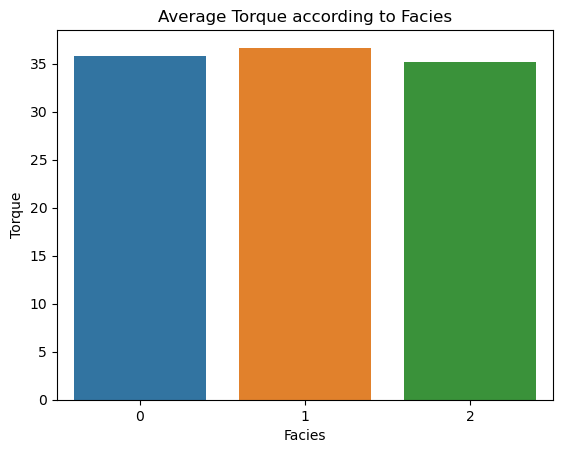

In [23]:
sns.barplot(x=df_p["Facies"], y=df_p["Torque"])
plt.title('Average Torque according to Facies')

### 3.3: Correlation plot (Heatmap) of numerical features

Text(0.5, 1.0, 'Correlation map of Numerical Variables')

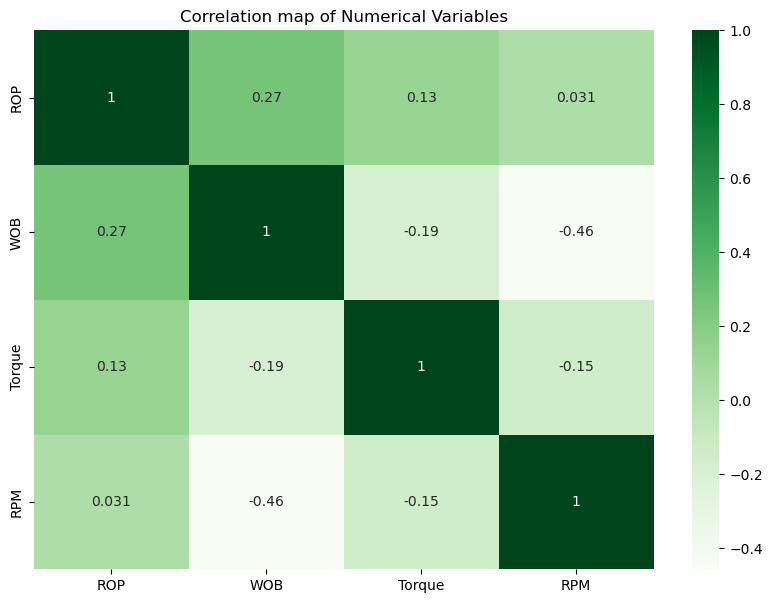

In [24]:
df_feature_num = df_clean[['ROP','WOB','Torque','RPM']]
# make a correlation plot (heatmap) to visualize the numerical variables
corr_mx = df_feature_num.corr()
f, ax = plt.subplots(figsize=(10,7))
ax = sns.heatmap(corr_mx, annot=True, annot_kws={'size':10}, cmap='Greens')
plt.title('Correlation map of Numerical Variables')

**Comment**

There is no multicollinearity between the features

Text(0.5, 1.0, 'Proportion of Facies')

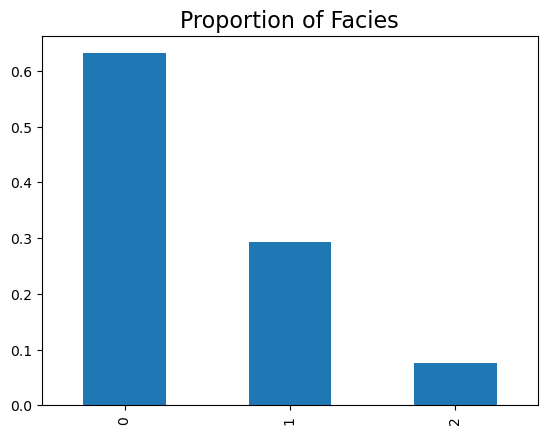

In [25]:
proportion = df_clean['Facies'].value_counts() / df_clean['Facies'].size
proportion.plot(kind = 'bar')
plt.title('Proportion of Facies', fontsize = 16)

## Clustering Analysis

**Scaling**

In [26]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_subset = df_clean[['ROP','WOB','Torque','RPM']]
extractedData_scaled = scaler.fit_transform(df_subset)

### Kmeans Clustering

In [27]:
Core_kmeans = KMeans(n_clusters = 3, init = 'k-means++') #, random_state = 11)
cluster_labels = Core_kmeans.fit_predict(extractedData_scaled)

In [28]:
df_subset['Facies'] = cluster_labels
df_subset.head()

,ROP,WOB,Torque,RPM,Facies
90,14.1333,7.9843,37.363,137.790,2
91,15.7535,7.9297,37.837,139.068,2
92,17.0971,8.4570,38.153,140.326,2
93,19.7154,8.2792,38.077,140.000,2
94,22.2153,8.7855,38.183,140.000,2


In [29]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Calculate silhouette score
silhouette_avg = silhouette_score(extractedData_scaled, cluster_labels)

# Calculate Calinski-Harabasz score
ch_score = calinski_harabasz_score(extractedData_scaled, cluster_labels)

# Calculate Davies-Bouldin score
db_score = davies_bouldin_score(extractedData_scaled, cluster_labels)

print("Silhouette Score:", silhouette_avg)
print("Calinski-Harabasz Score:", ch_score)
print("Davies-Bouldin Score:", db_score)


Silhouette Score: 0.3922260111740425
Calinski-Harabasz Score: 204.1762580985407
Davies-Bouldin Score: 1.0410710438285589


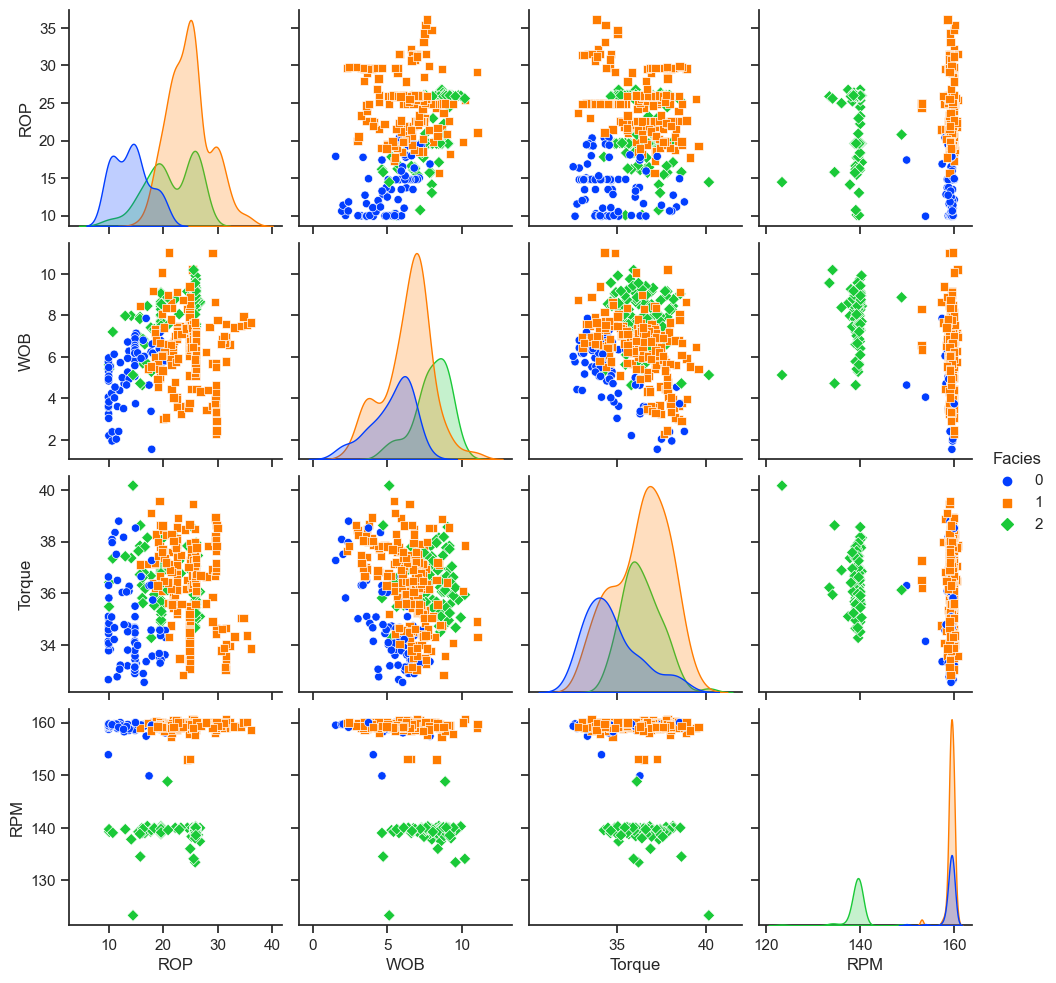

In [30]:
sns.set_theme(style="ticks")

sns.pairplot(df_subset, vars=['ROP','WOB','Torque','RPM'], hue = 'Facies', markers=["o", "s", "D"] , palette = "bright") # Create a matrix scatterplot

<AxesSubplot:xlabel='Facies', ylabel='ROP'>

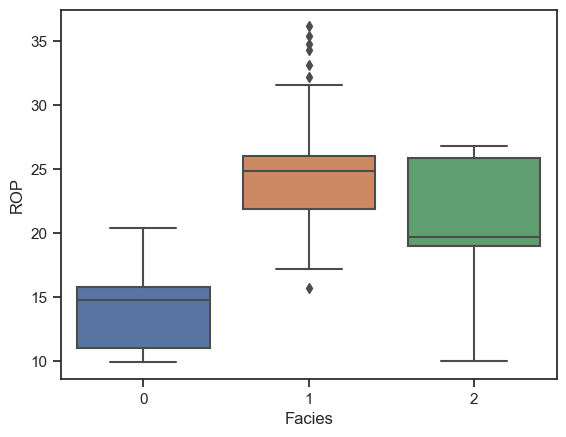

In [31]:
sns.boxplot(x = df_subset['Facies'], y = df_clean['ROP'])

<AxesSubplot:xlabel='Facies', ylabel='WOB'>

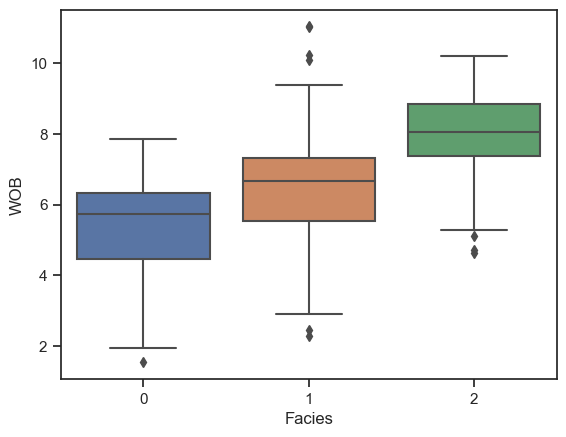

In [32]:
sns.boxplot(x = df_subset['Facies'], y = df_clean['WOB'])

<AxesSubplot:xlabel='Facies', ylabel='Torque'>

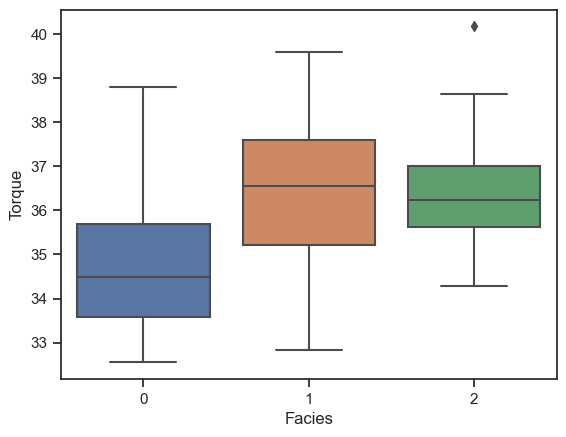

In [33]:
sns.boxplot(x = df_subset['Facies'], y = df_clean['Torque'])

<AxesSubplot:xlabel='Facies', ylabel='RPM'>

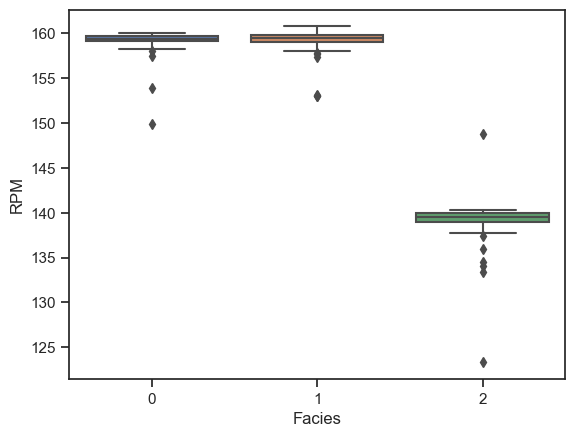

In [34]:
sns.boxplot(x = df_subset['Facies'], y = df_clean['RPM'])

### HMMGAUSSIAN

In [35]:
X= df_clean[['ROP', 'WOB', 'RPM', 'Torque']]
y= df_clean[['Facies']]

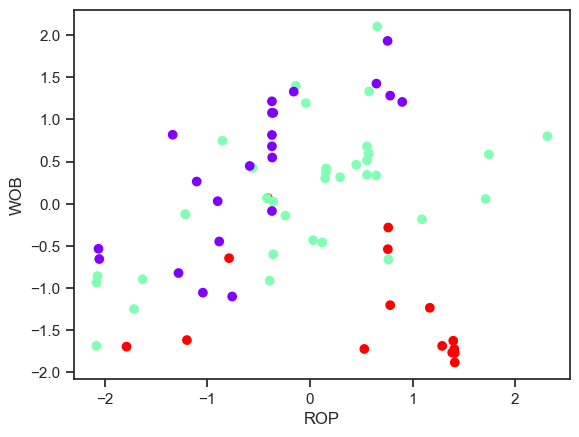

State sequence:
[1 1 0 1 1 2 0 2 1 2 1 2 0 0 1 0 0 0 1 1 2 1 2 1 0 1 1 2 2 1 1 0 1 1 1 2 1
 1 2 0 1 1 0 2 0 1 1 0 1 0 0 2 1 1 1 0 0 1 0 1 2 0 1 2 0 1 0 2 1 0 1 1]

Transition matrix:
[[0.30000002 0.3705919  0.32940808]
 [0.24796025 0.5703043  0.18173546]
 [0.17803982 0.63162427 0.1903359 ]]


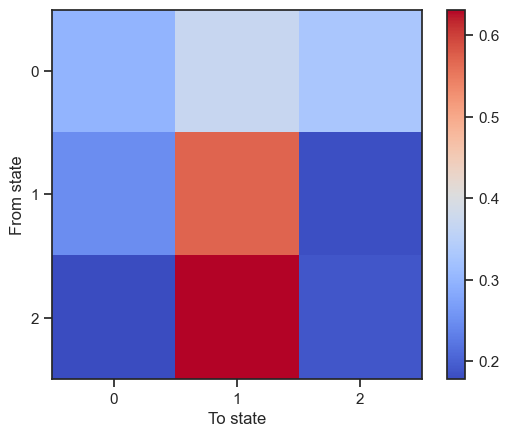

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=48)

# Scale the training and testing sets
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

n_states = 3  # define the number of states for the HMM

# Create an HMMGaussian model
model = hmm.GaussianHMM(n_components=n_states, covariance_type='full')

# Fit the model to the training data
model.fit(X_train_scaled)

# Get the state sequence for the testing data
state_sequence = model.predict(X_test_scaled)

# Get the transition matrix of the model
transition_matrix = model.transmat_

# Create a scatter plot of the testing data points with colors based on the state sequence
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=state_sequence, cmap='rainbow')
plt.xlabel('ROP')
plt.ylabel('WOB')
plt.show()

# Print the state sequence and transition matrix
print("State sequence:")
print(state_sequence)
print("\nTransition matrix:")
print(transition_matrix)

# Create a heatmap of the transition matrix
plt.imshow(transition_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(n_states))
plt.yticks(range(n_states))
plt.xlabel('To state')
plt.ylabel('From state')
plt.show()


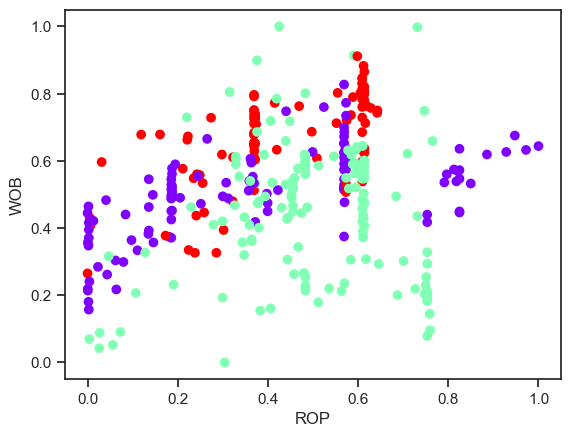

State sequence:
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 0 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1
 1 1 1 1 1 1 1 1 1 1 0 2 1 1 1 1 1 1 1 1 1 1 1 1 1]

Transition matrix:
[[0.9408143  0.0264005  0.0327852 ]
 [0.00504381 0.96672119 0.028235  ]
 [0.06492543 0.03289813 0.90217644]]


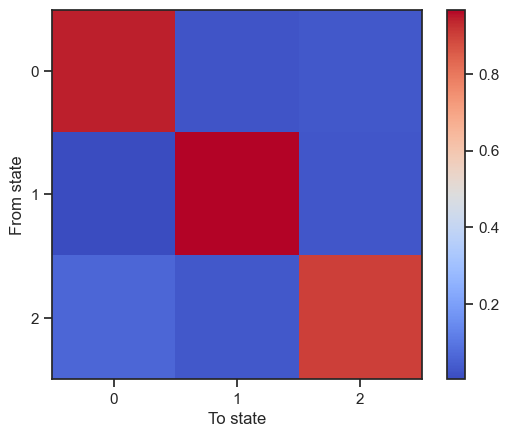

In [37]:
# Create an HMMGaussian model
n_states = 3  # define the number of states for the HMM

model = hmm.GaussianHMM(n_components=n_states, covariance_type='full')

# Fit the model to the data
model.fit(extractedData_scaled)

# Get the state sequence for the data
state_sequence = model.predict(extractedData_scaled)

# Get the transition matrix of the model
transition_matrix = model.transmat_

# Create a scatter plot of the data points with colors based on the state sequence
plt.scatter(extractedData_scaled[:, 0], extractedData_scaled[:, 1], c=state_sequence, cmap='rainbow')
plt.xlabel('ROP')
plt.ylabel('WOB')
plt.show()

# Print the state sequence and transition matrix
print("State sequence:")
print(state_sequence)
print("\nTransition matrix:")
print(transition_matrix)

# Create a heatmap of the transition matrix
plt.imshow(transition_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(n_states))
plt.yticks(range(n_states))
plt.xlabel('To state')
plt.ylabel('From state')
plt.show()